In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/DMhw/DMhw3/Dry_Bean_Dataset.csv',encoding= 'unicode_escape',parse_dates=[0])
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

## 資料前處理

In [3]:
#刪除重複和問號的值
print("原始比數：",df.shape)
df.drop_duplicates(inplace=True)
print("刪除重複的值後：",df.shape)


df_X=df.drop(['Class'], axis=1)
outcome=list(df.columns[16:17])
df_y=df[outcome]
df_y

原始比數： (13611, 17)
刪除重複的值後： (13543, 17)


Class
0         SEKER
1         SEKER
2         SEKER
3         SEKER
4         SEKER
...         ...
13606  DERMASON
13607  DERMASON
13608  DERMASON
13609  DERMASON
13610  DERMASON

[13543 rows x 1 columns]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_y["Class"]= le.fit_transform(df_y["Class"])
df_y

C:\Users\user\AppData\Local\Temp\ipykernel_2492\3473148764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y["Class"]= le.fit_transform(df_y["Class"])


Class
0          5
1          5
2          5
3          5
4          5
...      ...
13606      3
13607      3
13608      3
13609      3
13610      3

[13543 rows x 1 columns]

In [5]:
a = df_y["Class"].values
pd.array(a).unique()

<IntegerArray>
[5, 0, 1, 2, 4, 6, 3]
Length: 7, dtype: Int32

## 模型

### KMeans

In [6]:
import time
from sklearn.cluster import KMeans
kmeans_start=time.time()
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_X)
kmeans_pred_y = kmeans.predict(df_X)
kmeans_end=time.time()
kmeans_pred_y

array([0, 0, 0, ..., 4, 4, 4])

### 階層式分群

In [7]:
from sklearn.cluster import AgglomerativeClustering
Hierarchical_start=time.time()
Hierarchical=AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
#n_clusters: 要分成幾群，給定數值
# affinity: 距離的計算方式，”euclidean”,”l1″,”l2″,”manhattan”,”cosine”…
# linkage: 群與群之間的距離，”ward”,”complete”,”average”,”single”
Hierarchical_pred_y = Hierarchical.fit_predict(df_X)
Hierarchical_end=time.time()
Hierarchical_pred_y 

array([1, 1, 1, ..., 4, 4, 4], dtype=int64)

### DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
DBSCAN_start=time.time()
DBSCAN_cluster= DBSCAN(eps=0.65, min_samples=8)
DBSCAN_pred_y=DBSCAN_cluster.fit_predict(df_X)
DBSCAN_end=time.time()
print(DBSCAN_pred_y)

[-1 -1 -1 ... -1 -1 -1]


## purity績效評估

In [9]:
import numpy as np
from sklearn import metrics
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## 純度與執行時間

In [10]:
print('kmeans purity',purity_score(df_y,kmeans_pred_y))
print('Hierarchica purity',purity_score(df_y,Hierarchical_pred_y))
print('DBSCAN purity',purity_score(df_y,DBSCAN_pred_y))
print('kmeans執行時間',kmeans_end-kmeans_start)
print('Hierarchical執行時間',Hierarchical_end-Hierarchical_start)
print('DBSCAN執行時間',DBSCAN_end-DBSCAN_start)

kmeans purity 0.5643505870191242
Hierarchica purity 0.6051834896256368
DBSCAN purity 0.2618326810898619
kmeans執行時間 0.39330077171325684
Hierarchical執行時間 10.38840103149414
DBSCAN執行時間 0.3652048110961914


In [11]:
def get_entropy(x, n_clusters):
    p = np.zeros(n_clusters)
    for i in range(n_clusters):
        p[i] = (-1)*(x.count(i)/len(x))*np.log(x.count(i)/len(x))

    return np.sum(p)

In [12]:
list = kmeans_pred_y.tolist()
# list2 = df_y.tolist()
print('kmeans entropy',get_entropy(list,7))
# kmeans_pred_y.count[1]

AttributeError: 'DataFrame' object has no attribute 'tolist'

# visualize function

In [ ]:
#Importing required modules
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
def PCA_fiture(x,label,title):  
 #Load Data
 pca = PCA(2)
 
 #Transform the data
 x = pca.fit_transform(x)
 
 #Import KMeans module
 from sklearn.cluster import KMeans
 
 #Getting unique labels
 u_labels = np.unique(label)

 #plotting the results:
 for i in u_labels:
  plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i)
 plt.legend()
 plt.title(title)
 plt.show()
# print(u_labels)

# show

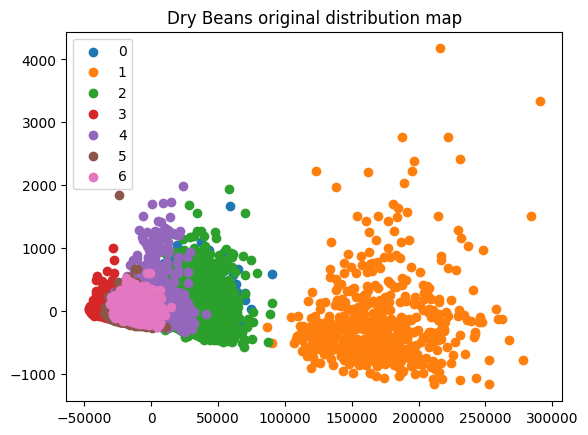

In [ ]:
df_ini_y=[]
type(df_ini_y)  
for i in df_y['Class']:
  df_ini_y.append(i)
PCA_fiture(df_X,df_ini_y,"Dry Beans original distribution map")

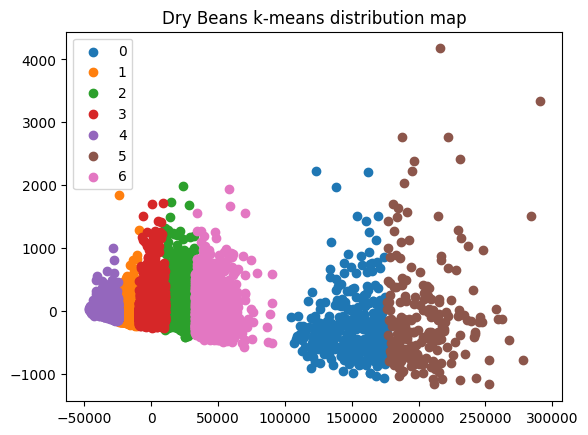

In [ ]:
PCA_fiture(df_X,kmeans_pred_y,"Dry Beans k-means distribution map")

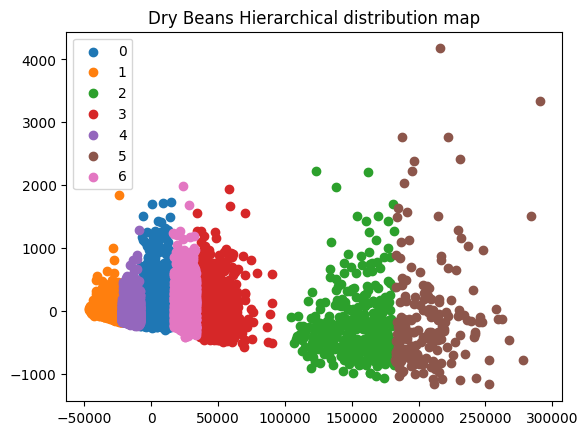

In [ ]:
PCA_fiture(df_X,Hierarchical_pred_y,"Dry Beans Hierarchical distribution map")